In [2]:
import scipy.stats as ss
import math
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
warnings.filterwarnings('ignore')
%matplotlib inline
font = {
        'family' : 'serif',
        'size'   : 26}
matplotlib.rc('font', **font)

In [3]:
df=pd.read_csv('../output_csv/cls_statistic.csv')
model_list=["AB_max","ET_max","RF_max","GB_max","DT_max","SVM_max"]
df

,Unnamed: 0,datasets,RF_mean,RF_max,RF_min,RF_std,GB_mean,GB_max,GB_min,GB_std,...,SVM_min,SVM_std,ET_mean,ET_max,ET_min,ET_std,AB_mean,AB_max,AB_min,AB_std
0,0,phpkIxskf.csv,0.702625,0.729163,0.577055,0.028840,0.712963,0.738619,0.511536,0.026607,...,0.501448,0.033565,0.665859,0.725358,0.571867,0.041745,0.696965,0.739690,0.500000,0.028549
1,1,dataset_186_satimage.csv,0.940535,0.953255,0.924139,0.005277,0.934435,0.956336,0.597729,0.039311,...,0.568894,0.094251,0.937735,0.954838,0.917793,0.006477,0.919348,0.956144,0.675739,0.040429
2,2,phpGReJjU.csv,0.998476,1.000000,0.992149,0.001779,0.748595,1.000000,0.505052,0.216918,...,0.523450,0.234115,0.999965,1.000000,0.999724,0.000053,0.938830,1.000000,0.489894,0.131815
3,3,leukemia.csv,0.908388,1.000000,0.732500,0.054569,0.939793,1.000000,0.821667,0.028799,...,0.500000,0.163703,0.941088,0.983333,0.500000,0.052072,0.819608,0.983333,0.702500,0.050714
4,4,phplE7q6h.csv,0.901998,0.940336,0.840513,0.017234,0.896768,0.960080,0.559668,0.071872,...,0.471178,0.178394,0.634219,0.949953,0.500000,0.142008,0.890185,0.967753,0.680905,0.075839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,189,phplVyjYQ.csv,0.769474,0.856212,0.653368,0.042540,0.777981,0.846636,0.536645,0.033350,...,0.611706,0.021225,0.759809,0.842922,0.653368,0.039676,0.798096,0.847922,0.669511,0.020886
190,190,phpu00N5N.csv,0.800418,0.908571,0.580536,0.062708,0.823333,0.927143,0.706964,0.027036,...,0.563393,0.066881,0.769263,0.932321,0.559643,0.069982,0.806200,0.907143,0.601429,0.034603
191,191,schizo.csv,0.558210,0.619158,0.465870,0.024687,0.565059,0.631209,0.494444,0.021336,...,0.435498,0.025552,0.592270,0.638909,0.546855,0.011929,0.550535,0.623775,0.471507,0.023371
192,192,speeddating.csv,0.998153,1.000000,0.927536,0.007263,0.999714,1.000000,0.941289,0.002773,...,0.660660,0.006631,0.998373,1.000000,0.943478,0.006534,1.000000,1.000000,1.000000,0.000000


In [4]:
df=df[model_list]
lst=["AB","ET","RF","GB","DT","SVM"]
df.columns=["AB","ET","RF","GB","DT","SVM"]
df

,AB,ET,RF,GB,DT,SVM
0,0.739690,0.725358,0.729163,0.738619,0.712951,0.698456
1,0.956144,0.954838,0.953255,0.956336,0.921329,0.953624
2,1.000000,1.000000,1.000000,1.000000,0.998264,1.000000
3,0.983333,0.983333,1.000000,1.000000,0.970000,0.911667
4,0.967753,0.949953,0.940336,0.960080,0.846515,0.907268
...,...,...,...,...,...,...
189,0.847922,0.842922,0.856212,0.846636,0.820545,0.809636
190,0.907143,0.932321,0.908571,0.927143,0.893571,0.880000
191,0.623775,0.638909,0.619158,0.631209,0.606822,0.624632
192,1.000000,1.000000,1.000000,1.000000,1.000000,0.728794


In [5]:
df_out=pd.DataFrame(index=["GB","AB","RF","ET","DT","SVM"],columns=["GB","AB","RF","ET","DT","SVM"])
for model1 in lst:
    for model2 in lst:
        if model1==model2:
            df_out[model1][model2]=None
        else:
            df_out[model2][model1]= len(df[ df[model1]>df[model2]+0.01])

In [6]:
df_out

,GB,AB,RF,ET,DT,SVM
GB,None,27,53,67,126,128
AB,23,None,56,62,122,129
RF,16,27,None,37,111,121
ET,13,20,18,None,101,111
DT,12,14,17,25,None,97
SVM,16,11,22,28,57,None


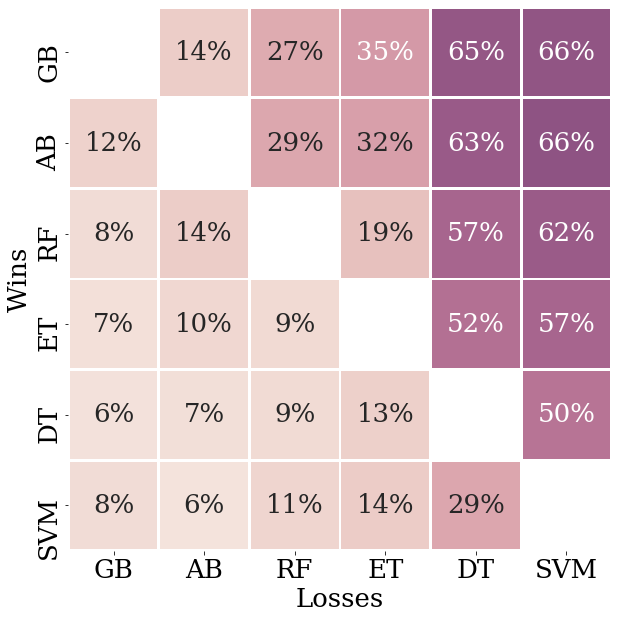

In [14]:
 plt.figure(figsize=(12,10))
# plt.title("Exact value")
ax=sns.heatmap(df_out.astype(float), fmt='0.0%', cmap=sns.cubehelix_palette(500, light=0.95, dark=0.15), square=True, annot=True, vmin=0., vmax=1.0, cbar=False, linewidth=2 , edgecolor=".2")
bottom, top = ax.get_ylim()
# plt.xticks(rotation=45)
# ax.set_ylim(bottom + 0.5, top - 0.5);
h = plt.gcf()
plt.xlabel('Losses')
plt.ylabel('Wins')
h.savefig("../output_plots/classifiers_ranks.pdf" ,bbox_inches = 'tight',pad_inches = 0, format='pdf')